## Tarea 1 - Fuerza Centrífuga y la Dirección de la Caída Libre (Capítulo 9, Taylor)

**Fecha de Entrega:** Hasta las 23:59 horas del miércoles 23 de agosto de 2023.

**Formato de Entrega:** Únicamente archivos en formato PDF, con los nombres, apellidos y código.

1. Calcular la dependencia del ángulo $\alpha$ con la latitud. Graficar $\alpha$ en función de la latitud geográfica ($-90^\circ$, $90^\circ$). Interprete físicamente los resultados. Presente su discusión comentando lo que ocurre en cinco ciudades ubicadas en latitudes que ayuden a la interpretación de los resultados.

2. Cálculo de $\alpha_{\text{max}}$. Demuestre que en aproximación de primer orden, $\alpha_{\text{max}}$ se puede expresar como:  
$$
\alpha_{\text{max}} = \frac{\Omega^2 \cdot R^3}{2GM}
$$

3. Hallar el ángulo de máxima desviación respecto a la vertical (en segundos, minutos o grados de arco, según sea el caso) para el Sol, Júpiter, Tierra, Marte, la Luna y una estrella de neutrones. Presente los resultados en una tabla donde se vean los parámetros físicos (con sus respectivas unidades) necesarios para calcular $\alpha$: $\Omega$, radio, etc.


# Solucion

### 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
# Initial data
latitudes = np.linspace(-90, 90, 1000)
Omega = 7.2921150e-5  # Angular velocity of Earth (rad/s)
R = 6371e3  # Earth's radius in meters
g = 9.8  # Acceleration due to gravity (m/s^2)

# Function to calculate the alpha angle
def alpha(lat):
    return Omega**2 * R * np.sin(lat * np.pi / 180) * np.cos(lat * np.pi / 180) / (g - Omega**2 * R * np.sin(lat * np.pi / 180)**2)




In [3]:
# Function to calculate the alpha angle
def alpha(lat):
    return Omega**2 * R * np.sin(lat * np.pi / 180) * np.cos(lat * np.pi / 180) / (g - Omega**2 * R * np.sin(lat * np.pi / 180)**2)



In [4]:
# Important cities with latitude for the graph
cities_list = [
    {"Latitude": 59, "City": "Estocolmo"},
    {"Latitude": 40, "City": "Nueva York"},
    {"Latitude": 31, "City": "El Cairo"},
    {"Latitude": 19.4, "City": "Ciudad de México"},
    {"Latitude": 8.98, "City": "Ciudad de Panamá"},
    {"Latitude": -0.18, "City": "Quito"},
    {"Latitude": -12, "City": "São Paulo"},
    {"Latitude": -23, "City": "Sídney"},
    {"Latitude": -33, "City": "Ciudad del Cabo"},
    {"Latitude": -55, "City": "Puerto Williams"},
]



In [5]:
# Create a DataFrame with calculated alpha values
df = pd.DataFrame(cities_list)
df['Alpha'] = df['Latitude'].apply(alpha)



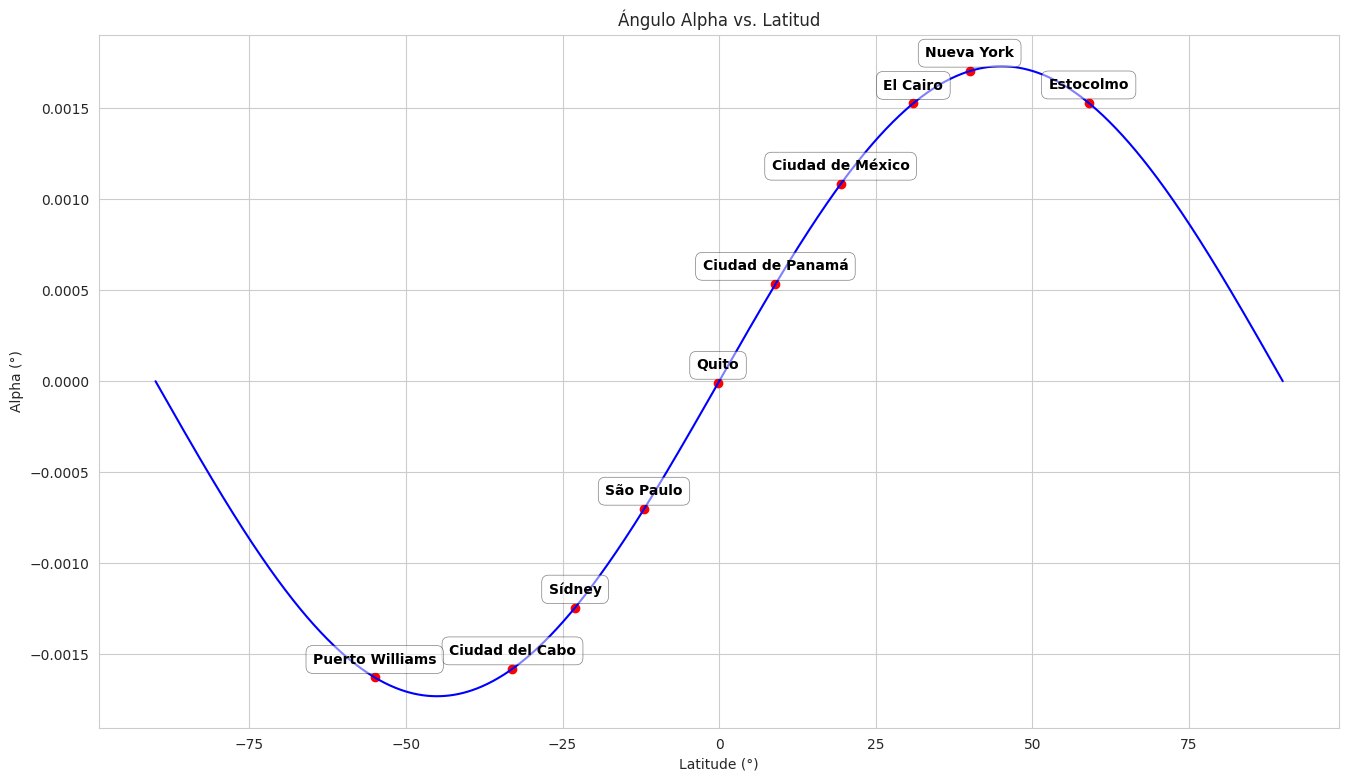

In [6]:
# Plotting the graph
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
plt.plot(latitudes, alpha(latitudes), color='blue')
plt.scatter(df['Latitude'], df['Alpha'], color='red')

# Add labels for each city point
for index, row in df.iterrows():
    plt.text(
        row['Latitude'], row['Alpha'] + 0.00006, row['City'],
        fontsize=10, color='black', weight='bold',  # Adding 'weight' parameter
        horizontalalignment='center', verticalalignment='bottom',
        rotation_mode='anchor',
        bbox=dict(
            boxstyle='round', facecolor='white', alpha=0.5,
            edgecolor='black', pad=0.5, linewidth=0.5, linestyle='solid',
            joinstyle='round', capstyle='round'
        ),
        zorder=10, clip_on=True
    )

plt.xlabel('Latitude (°)')
plt.ylabel('Alpha (°)')
plt.title('Ángulo Alpha vs. Latitud')
plt.savefig('alpha_vs_latitud.svg', format='svg', dpi=1200)
plt.show()

### 2)

Partimos de la siguiente expresión para la fuerza centrífuga en un cuerpo en rotación, como la Tierra, como la vimos en clase:

$$F_{\text{centrífuga}} = m \cdot R \cdot \Omega^2 \sin{\theta}$$

donde $m$ es la masa del objeto, $R$ es la distancia al eje de rotación (radio de la Tierra) y $\Omega$ es la velocidad angular de la Tierra.

La fuerza gravitacional que actúa sobre el objeto es:

$$F_{\text{gravedad}} = m \cdot g$$

donde $g$ es la aceleración debida a la gravedad.

Cuando estas dos fuerzas se equiparan, el objeto se encuentra en caída libre pero experimenta una desviación angular $\alpha$ respecto a la vertical. Esta desviación se puede calcular por descomposicion vectorial como:

$$\tan \alpha = \frac{F_{\text{centrífuga}}}{F_{\text{gravedad}}} = \frac{R \cdot \Omega^2 \sin{\theta}}{g}$$

Para calcular $\alpha_{\text{max}}$ en función de los parámetros dados, primero necesitamos entender en qué condiciones ocurre esta máxima desviación angular. La máxima desviación $\alpha_{\text{max}}$ ocurre cuando $\sin{\theta}=1$, es decir, en la latitud 90 (el ecuador).

La expresión para la desviación angular $\alpha$ en términos de los parámetros dados es:

$$\tan \alpha = \frac{R \cdot \Omega^2 \sin{\theta}}{g}$$

Donde:
- $R$ es el radio de la Tierra.
- $\Omega$ es la velocidad angular de la Tierra.
- $\theta$ es el ángulo de latitud.
- $g$ es la aceleración debida a la gravedad.

Queremos encontrar el valor máximo de $\alpha$ (denotado como $\alpha_{\text{max}}$). Para hacer esto, necesitamos determinar en qué valor de $\theta$ la función $\tan \alpha$ alcanza su máximo. Dado que $\tan$ es una función periódica con un período de $\pi$, podemos enfocarnos en un intervalo de longitud $\pi$.

En el intervalo $\theta = 0$ a $\theta = \pi/2$ (equivalente a $0^\circ$ a $90^\circ$ de latitud), $\sin{\theta}$ aumenta y $\Omega^2$ y $g$ son constantes. Por lo tanto, para maximizar $\alpha$, debemos maximizar la función $\sin{\theta}$, lo cual ocurre en $\theta = \pi/2$ ($90^\circ$ de latitud). En este punto, $\alpha_{\text{max}}$ se convierte en:

$$\tan \alpha_{\text{max}} = \frac{R \cdot \Omega^2 \sin{\left(\frac{\pi}{2}\right)}}{g} = \frac{R \cdot \Omega^2}{g}$$

Ahora, simplifiquemos la expresión primeramente aplicando arco tangente a ambos lados para dejar solo el ángulo a maximar, y como sabemos que maximizar la arco tangente de $x$ es igual a maximizar $x$, eliminamos ese arco tangente y posteriormente, reemplazando $\Omega^2$ por su definición en términos de $G$ (constante de gravitación universal) y $M$ (masa de la Tierra) obtenemos:

$$\alpha_{\text{max}} = \frac{\Omega^2 \cdot R}{g} = \frac{(GM/R^2) \cdot R}{g} = \frac{GM}{R \cdot g}$$

Finalmente, sustituyendo la aceleración debida a la gravedad $g$ por su expresión en términos de $G$ y $M$, que es $g = GM/R^2$, obtenemos:

$$\alpha_{\text{max}} = \frac{GM}{R \cdot g} = \frac{GM}{R \cdot (GM/R^2)} = \frac{\Omega^2 \cdot R^3}{2GM}$$
